# Investigation of Titanic Data

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

This project will look into the Titanic passengers data and investigate various factors which may affect the survivability of passengers. The dataset is obtained from [Kaggle Website](https://www.kaggle.com/c/titanic/data).

### Exploratory Data Analysis Plan
* Check for missing data (e.g. NaN, 0) 
* Describe the distribution of data in each columns (e.g. Mean, Median, Mode, Standard Deviation, IQR)
    * Check for extreme / questionable values (outliers, erronous values)
* Cross-tabulate data from different columns (e.g. port of embarkation and Age, Pclass and Fare, PClass and Cabin, etc)

### Investigation questions
The main bulk of the analysis will be on analyzing the dependency of passenger survival rate on some of the variables that are available in the datasets. Below are some possible variables that will be analyzed.
* Passenger Survival dependency on **Passenger Class**. Is it true that passenger in different **passenger class** has different survival rate?
* Passenger Survival dependency on **Gender**. Is it true that passenger of different **gender** has different survival rate?
* Passenger Survival dependency on **Port of Embarkation**. Is it true that passenger from different **Port of Embarkation** has different survival rate?
* Passenger Survival dependency on **Age Group**. Is it true that passenger from different **age group** has different survival rate?

### Data Preparation and Exploratory Data Analysis

First, we import all the necessary libraries for our analysis

In [59]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
import os
import ipy_table as tbl
from __future__ import division
from scipy import stats
from IPython.display import display, HTML

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 20)

# Size of matplotlib histogram bins
bin_size = 10

In [60]:
#import titanic-data.csv as dataframe and check the first five rows of the data
filename = "../datasets/titanic-data.csv"
passengers_df = pd.read_csv(filename)
passengers_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
passengers_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


We can see that there are several missing data points. 

We will analyze the missing values below.

In [62]:
passengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the result above, we can see that Age, Cabin, and Embarked columns have some missing value. In this case, Cabin has the most missing values.

In [63]:
## Check for Missing Data
display(passengers_df.isnull().sum())
#display(passengers_df[passengers_df.isnull().any(axis=1)].head(n=20)) #uncomment this to check the row detail of NaN records

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Zooming in to the missing values above, it can be seen that both Age and Cabin column have more rows with missing value(177 and 687 respectively) as compared to that of the Embarked column (2 rows).

Next, we can look at the descriptive statistics of the dataset to understand more about the data.

In [64]:
passengers_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table above, it can be seen that:
- There are 38% passengers survived and 62% did not survive
- The average age of passengers is around 29 years old with standard deviation of 14. The youngest pasenger is not yet one year old (0.42 year old).
- The average fare price is around \$32 with a standard deviation of 
$49. 


Now, we can look at each variables in more detail by visualizing the data in bar chart and frequency table.

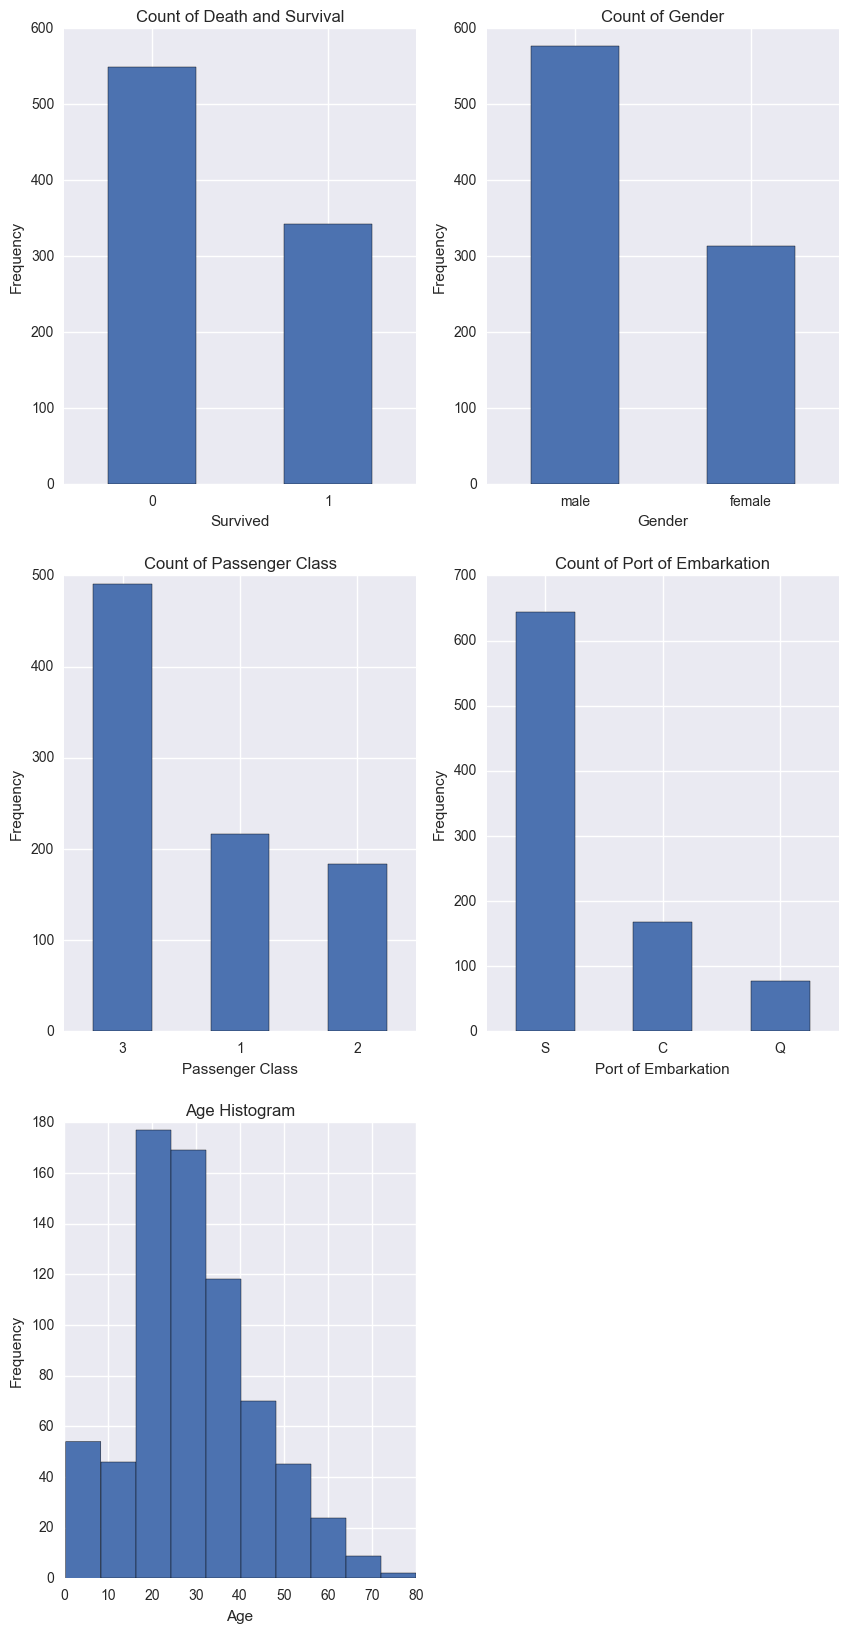

In [65]:
# Create plot grid 
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Survival counts
plt.subplot2grid(fig_dims, (0, 0))
passengers_df['Survived'].value_counts().plot(kind='bar', 
                                         title='Count of Death and Survival')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot Sex counts
plt.subplot2grid(fig_dims, (0, 1))
passengers_df['Sex'].value_counts().plot(kind='bar', 
                                    title='Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot Pclass counts
plt.subplot2grid(fig_dims, (1, 0))
passengers_df['Pclass'].value_counts().plot(kind='bar', 
                                       title='Count of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
passengers_df['Embarked'].value_counts().plot(kind='bar', 
                                         title='Count of Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Frequency')

plt.xticks(rotation=0)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
passengers_df['Age'].hist()
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [66]:
survived_tab = pd.crosstab(index=passengers_df["Survived"],  # Make a crosstab
                              columns="count")      # Name the count column

survived_tab_percent = pd.crosstab(index=passengers_df["Survived"],columns="count").apply(lambda r: r/r.sum(), axis=0)

gender_tab = pd.crosstab(index=passengers_df["Sex"],     # Make a crosstab
                      columns="count")      # Name the count column

pclass_tab = pd.crosstab(index=passengers_df["Pclass"],  # Make a crosstab
                        columns="count")               # Name the count column

embarked_tab = pd.crosstab(index=passengers_df["Embarked"],  # Make a crosstab
                        columns="count")               # Name the count column

display(survived_tab_percent)
display(survived_tab)
display(gender_tab)
display(pclass_tab)
display(embarked_tab)

col_0,count
Survived,
0,0.616162
1,0.383838


col_0,count
Survived,
0,549
1,342


col_0,count
Sex,
female,314
male,577


col_0,count
Pclass,
1,216
2,184
3,491


col_0,count
Embarked,
C,168
Q,77
S,644


From the frequency table and the histogram/bar charts above, we can see that:
    - 38% survived, 64% did not survive
    - 35% of the passengers are female, and 65% of them are male
    - Most of the passengers are in class 3, followed by class 1 and class 2
    - Most of the passengers embarked form port S, followed by port C, and port Q
    - The age range of most of the passengers is from 20 to 40 years old

### Exploring relationship between each variable and survival of passengers

As bar chart will be used for many of the analysis, we will define a function to create the bar chart.

In [67]:
#function for plotting stacked bar_chart
def do_stacked_bar_chart(df, chart_title, chart_xlabel, chart_ylabel):
    df.plot(kind='bar', 
                   stacked=True, 
                   title= chart_title)
    plt.xlabel(chart_xlabel)
    plt.ylabel(chart_ylabel)
    plt.xticks(rotation=0)
    plt.show()

#### Passenger Class and Survival

We are going to do a cross tabulation on survived and Pclass variable to check the number of survivor by passenger class.

In [68]:
pclass_cross = pd.crosstab(passengers_df['Pclass'], passengers_df['Survived'])
pclass_cross

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Next, we will calculate and plot the passenger survival rate per passenger class to see the proportion of survivors by passenger class. This help us understand more beside the exact count of survivor.

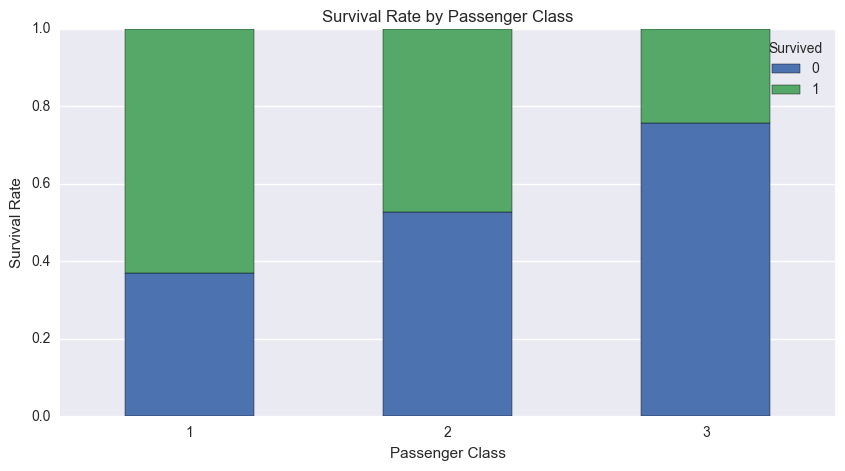

In [69]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_cross.div(pclass_cross.sum(1).astype(float), axis=0)

do_stacked_bar_chart(pclass_xt_pct,'Survival Rate by Passenger Class','Passenger Class','Survival Rate')

From the chart above, we can see that most of the survived passengers are from class 1 followed by class 2 and class 3. This may suggest that port of embarkation have an impact on passengers' survival. Probably, when the disaster happens, passengers in class 1 were more priviledged than the other class, so they were prioritized when assigning lifeboats.

Next, we are going to do a chi-square test of independence to check the impact of passenger class towards passenger survival.
* H0 = passenger class and passenger survival are independent, or unrelated
* HA = passenger survival depends on port of embarkation
* Significant level = 0.05


In [70]:
table = pd.crosstab([passengers_df['Survived']], passengers_df['Pclass'])
print (table.values.flatten())
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print dof
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

[ 80  97 372 136  87 119]
2


Item,Value
Chi-Square Test,102.8890
P-Value,0.0000


Because the p-value is below 0.05, we reject the null hypothesis. As such, it means that passenger survival depends on the port of embarkation.

From both the statistical test and the graphs, we can see that passenger survival depends on the port of embarkation.

#### Gender and Survival

Similar as the analysis above, we are going to use a stacked bar chart to analyze the survival rate by gender.

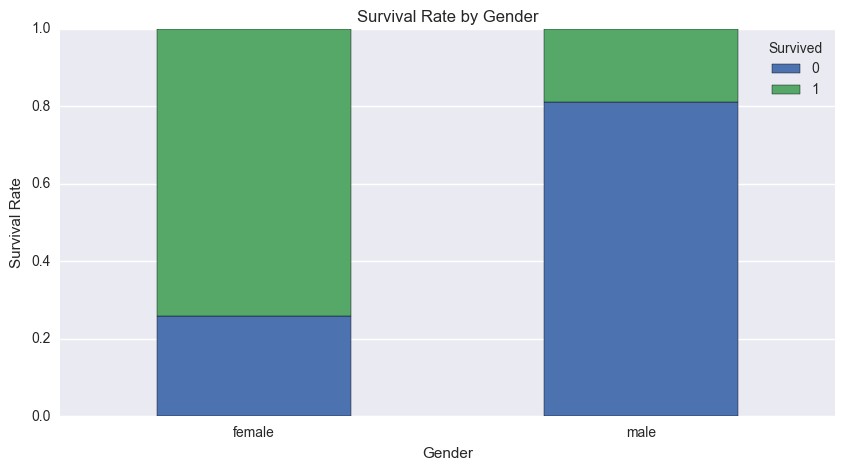

In [71]:
sex_xt = pd.crosstab(passengers_df['Sex'], passengers_df['Survived'])
sex_xt_pct = sex_xt.div(sex_xt.sum(1).astype(float), axis=0)

do_stacked_bar_chart(sex_xt_pct,'Survival Rate by Gender','Gender','Survival Rate')

Majority of the females survived, but only small portion of males did. This may suggest that gender has an impact on passengers' survival. Probably, when the disaster happens, female passengers were assigned to lifeboats before the male counterpart.

Next, we are going to do a chi-square test of independence to check the impact of gender towards passenger survival.
* H0 = gender and passenger survival are independent, or unrelated
* HA = passenger survival depends on gender
* Significant level = 0.05


In [72]:
table = pd.crosstab([passengers_df['Survived']], passengers_df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,260.7170
P-Value,0.0000


Because the p-value is below 0.05, we reject the null hypothesis. As such, it means that passenger survival depends on gender of the passengers.

From both the statistical test and the graphs, we can see that passenger survival depends on the gender of passengers

We will now look at how the combination of these two variables affect passengers' survival.

In [73]:
# Count of passengers by gender and port of embarkation
surv_gender_pclass = pd.crosstab(index=passengers_df["Survived"], 
                             columns=[passengers_df["Pclass"],
                                      passengers_df["Sex"]],
                             margins=True)   # Include row and column totals

# surv_port of embarkation_pclass_percent = surv_port of embarkation_pclass.apply(lambda r: r/r.sum(), axis=0)
surv_gender_pclass_percent = surv_gender_pclass/surv_gender_pclass.ix['All']
display(surv_gender_pclass_percent)

Pclass           1                   2                3                 All
Sex         female      male    female      male female      male          
Survived                                                                   
0         0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
1         0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000

From the table above, we can see that female passengers have higher chances of surviving.

Next, we are going to check passenger survival rate by passenger class and gender to uncover more information on the survival rate with more variables.

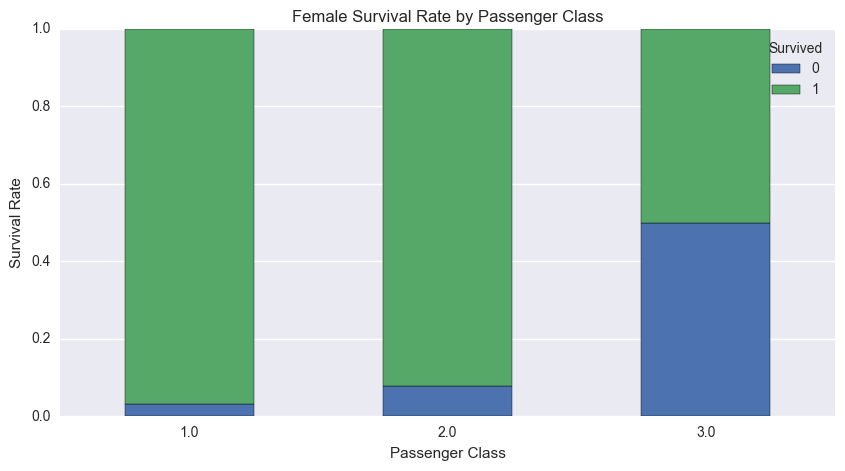

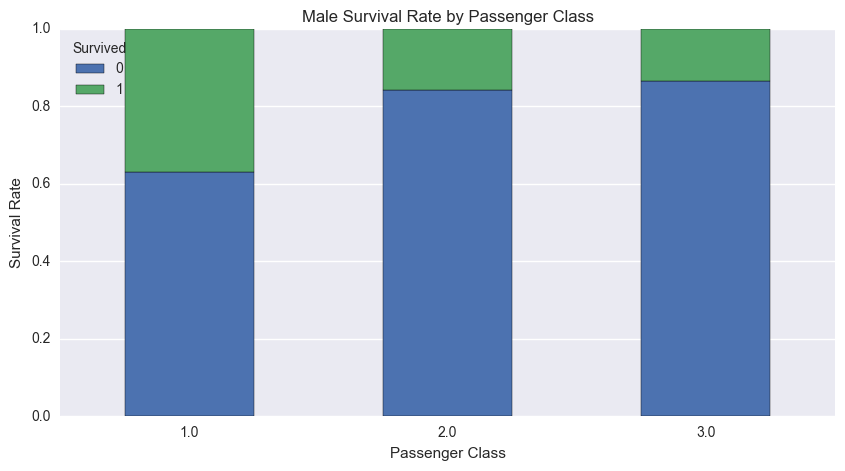

In [74]:
# Plot survival rate by Sex
females_df = passengers_df[passengers_df['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], passengers_df['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
do_stacked_bar_chart(females_xt_pct,'Female Survival Rate by Passenger Class', 'Passenger Class', 'Survival Rate')

# Plot survival rate by Pclass
males_df = passengers_df[passengers_df['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], passengers_df['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
do_stacked_bar_chart(males_xt_pct,'Male Survival Rate by Passenger Class', 'Passenger Class', 'Survival Rate')

The majority of the survived passengers are female passengers in class 1, and class 2. Male passengers in class 1 have a higher survival rate. This may suggest that passengers from higher passenger classes are more priviledged or have spent more ticket fare, as such they were prioritized for lifeboats during the incident.

#### Ports of embarkation and survival

Now, we are going to analyze the dependency of passenger survival on ports of embarkation.

From the analysis above, we have known that:
- There are two data points that have missing values for Embarked column.
- Port S is the most occured value in Embarked column. As such, we will replace the "NaN" value in Embarked column with "S". This approach may affect the accuray of the statistical result, but it is the safest approach as we have no other information to infer for the missing data.

In [75]:
# Replace the missing values with "S"
passengers_df["Embarked"] = passengers_df["Embarked"].fillna("S")

In [76]:
# Validate whether all the missing value in Embarked column has been replaced
passengers_df[passengers_df["Embarked"].isnull()]        
print "Missing values in Embarked column:", len(passengers_df[passengers_df['Embarked'].isnull()])

embarked_sorted = sorted(passengers_df['Embarked'].unique())
print "Unique values in Embarked column: ", embarked_sorted

Missing values in Embarked column: 0
Unique values in Embarked column:  ['C', 'Q', 'S']


After filling the missing values, we are going to visualize the survival rate by ports of embarkation.

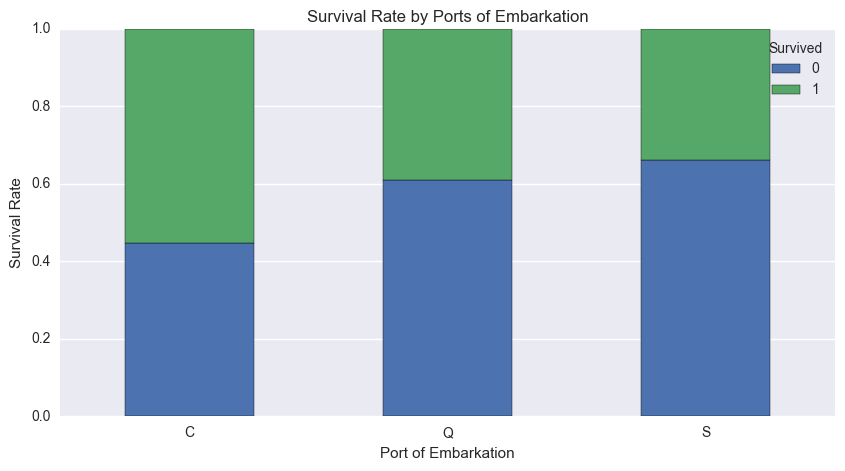

In [77]:
embarked_val_xt = pd.crosstab(passengers_df['Embarked'], passengers_df['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
do_stacked_bar_chart(embarked_val_xt_pct, "Survival Rate by Ports of Embarkation", "Port of Embarkation", "Survival Rate") 

From the graph above, it seems that Port C has the most survived passengers. Up until this point, we still do not know what is the reasong that port C hasthe highest survival rate. Perhaps, passengers from port C consist more of passenger class 1 or more of female?

Next, we are going to do a chi-square test of independence to check the impact of port of embarkation towards passenger survival.
* H0 = port of embarkation and passenger survival are independent, or unrelated
* HA = passenger survival depends on port of embarkation
* Significant level = 0.05

In [78]:
table = pd.crosstab([passengers_df['Survived']], passengers_df['Embarked'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,25.9645
P-Value,0.0000


Because the p-value is below 0.05, we reject the null hypothesis. As such, it means that passenger survival depends on the port of embarkation.

From both the statistical test and the graphs, we can see that passenger survival depends on the port of embarkation.

Next, we will look into detail on the relationship between port of embarkation and gender.

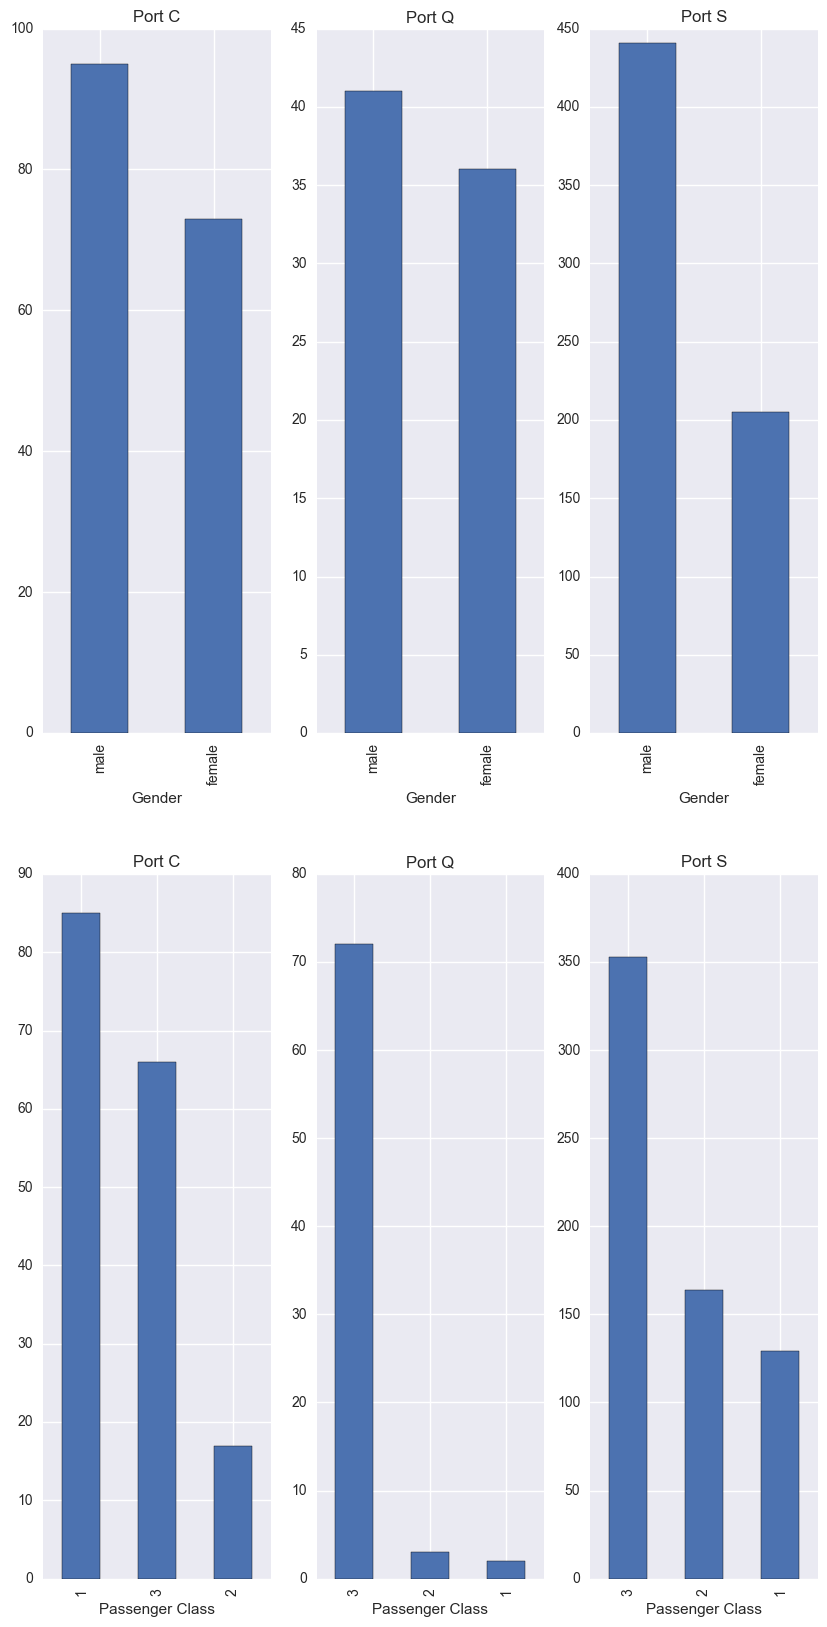

In [79]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

rows = 2
cols = 3
col_names = ('Sex', 'Pclass')

for portIdx in embarked_sorted:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx, embarked_sorted.index(portIdx) ))
        passengers_df[passengers_df['Embarked'] == portIdx][col_names[colIdx]] \
            .value_counts().plot(kind='bar', title='Port '+portIdx)
        if colIdx == 0:
            plt.xlabel('Gender')
        else:
            plt.xlabel('Passenger Class')

Answering the questions we have previously on the reason behind the high survival rate on port C. We can see that Port C has highest proportion of female passengers, and it also has highest proportion of passengers in class 1. This finding also strengthens our finding previously that female passenger and passengers from passenger class 1 have higher survival rate.

#### Age and Survival Rate

First, we will analyze which age range has the most passengers survived or not survived by using a joint plot.

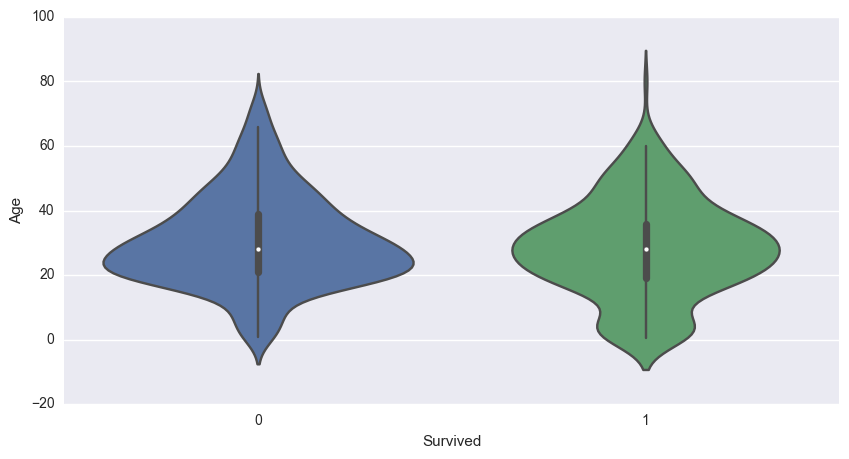

In [80]:
sns.violinplot("Survived", "Age", data=passengers_df)
sns.plt.show()

From the violin plot, for the survived passengers, we can see that there is a slight bump at age 0 to approximately 10. This may tell us that children passengers aged from 0 to 10 are prioritized to be rescued during the incident. 

For the passengers that did not survive, it seems that the most crowded area is between age 20 to 40. This may be caused by the distribution of the passengers itself, in which most of the passengers are aged from 20 to 40.

We will analyze the dependency of passenger survival on passenger age in more detail below.

From the initial analysis, we understand that there are several missing values in the age variable. Because the distribution of passenger age is right skewed, we will fill the missing values with the median of the age distribution.

Afterward, we are going to group the passenger age, so that it can be visualized more easily with histogram and bar chart.

In [81]:
#create a new column 'AgeEdit' to fill in the edited age values, where we fill in the missing values
passengers_df['AgeEdit'] = passengers_df['Age']

#Return a subset of passengers_df where the AgeEdit column is not null
passengers_df = passengers_df[pd.notnull(passengers_df['AgeEdit'])]
        
#Group the age range
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
passengers_df['age_group'] = pd.cut(passengers_df.Age, range(0, 81, 10), right=False, labels=age_labels)

Verify that the missing values have been replaced

In [82]:
len(passengers_df[passengers_df['AgeEdit'].isnull()])

0

Next, we are going to visualize number of passengers by age group with histogram.

C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Program Files\Anaconda2\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


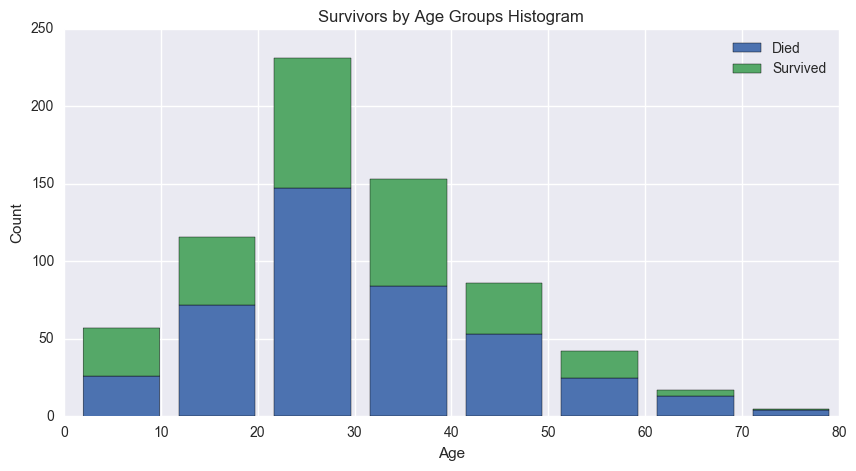

In [83]:
# Set up a grid of plots
# fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeEdit segmented by Survived
df1 = passengers_df[passengers_df['Survived'] == 0]['Age']
df2 = passengers_df[passengers_df['Survived'] == 1]['Age']
max_age = max(passengers_df['AgeEdit'])
plt.hist([df1, df2], 
             bins=max_age / bin_size, 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

From the histogram above, we can see that age-group of 20-30 has the most passengers.However, we cannot comprehend passenger survival rate from the histogram above.

As such, we are going to check the survival rate by age group.

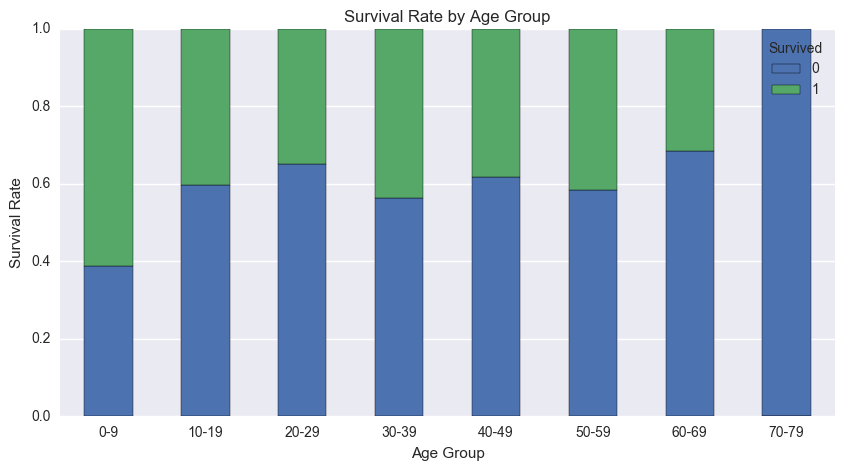

In [84]:
age_group_xt = pd.crosstab(passengers_df['age_group'], passengers_df['Survived'])
age_group_xt_pct = \
    age_group_xt.div(age_group_xt.sum(1).astype(float), axis=0)
do_stacked_bar_chart(age_group_xt_pct, "Survival Rate by Age Group", "Age Group", "Survival Rate") 

From the histogram above, we can see that age group of 0-9 has the most passenger survival rate. Next, we are going to check whether gender plays a part in the passenger survival rate as well.

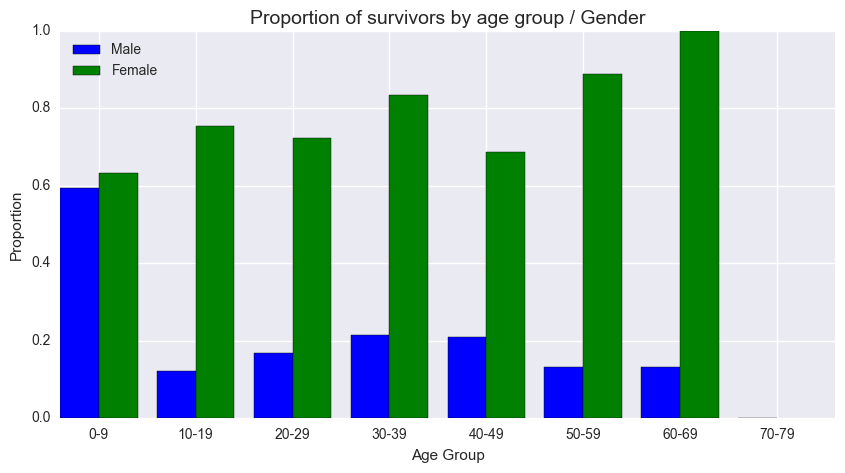

In [85]:
male_data = passengers_df[passengers_df.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = passengers_df[passengers_df.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='g')
tick_spacing = np.array(range(len(age_labels)))+0.4
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

From the result above, it shows that passengers that are most likely to survive are:
- children aged from 0-9, in spite of gender
- female passengers, in spite of ages

Surprisingly, older passengers who are male, did not seem to have a high survival rate.

This result may suggest that female passengers and children aged from 0 to 9 years old are prioritized to be rescued when the incident occured.

Next, we are going to do a chi-square test to check the dependency of survival rate on age group.
* H0 = gender and passenger survival are independent, or unrelated
* HA = passenger survival depends on gender
* Significant level = 0.05

In [86]:
table = pd.crosstab([passengers_df['Survived']], passengers_df['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,19.5301
P-Value,0.0067


Because the p-value is below 0.05, we reject the null hypothesis. As such, it means that passenger survival depends on the age group.

From both the statistical test and the graphs, we can see that passenger survival depends on the age group.

## Summary

From the statistical analysis above, we can understand that there are some factors in which passenger survival depends on:
- **Passenger class**: passenger from passenger class 1 has higher chances to survive.
- **Gender**: female passengers has higher chance to survive.
- **Port of embarkation**: passengers from port C has higher chance to survive.
- **Age group**: children passengers aged from 0-9 have higher chance of survival.

Through the analysis we have done, we can safely assume that there is a policy in which female and children are rescued first. Passengers from a higher passenger class (class 1 being higher than 3) had more priority during assigning of lifeboats, thus had higher survival rate. Passengers from Port C has higher chance to survive perhaps because passengers from that port have high proportion of female passengers and passengers from class 1.

## Limitation

In this analysis, we did not explore:
* **Multicollinearity problem**, in which combination of multiple independent variables are highly correlated to each other, which may affect the result of the dependent variable (passenger survival rate). In this case, passengers from port of embarkation C has the highest survival rate. However, port C also has the highest proportion of female passengers and passenger class 1. As such, we are not very sure of wheteher one variable or multiple variables are affecting the survival rate.
* **Passenger or crew information**. In the dataset, we do not have information of whether the person on board was a passenger or crew. If we have this information, we could have analyzed whether survival rate depends on being a crew or a passenger. By logical thinking, passengers of course would have higher chances of survival.
* **Number of lifeboats available / assigned**. I believe that if we have information on the number of lifeboats available / assigned, we could have analyzed more on the reason behind the high casualty rate. Perhaps, something like the proportion on "number of lifeboats available vs number of passengers on boat" would give us a rough idea on the availability of lifeboats per passenger.